## Supermarket Analysis V1 

## Step 1: Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Load and understand dataset

In [4]:
df = pd.read_csv(r'C:\Users\melli\OneDrive\Desktop\Python Portfolio\4. Supermarket Sales Analysis\supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

With a clean dataset, we can then perform an EDA

## Step 3: Perform exploratory data analysis on dataset

### Which product line is most purchased?

In [9]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [10]:
product = df.groupby('Product line').sum()
product

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1


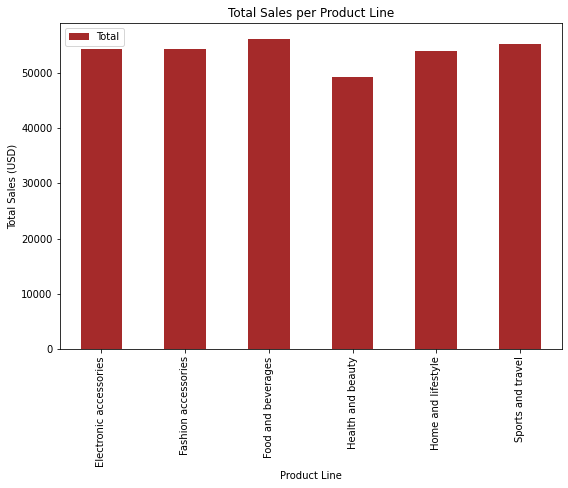

In [37]:
product.plot(kind='bar', y = 'Total', figsize=(9, 6), color = 'brown')
plt.title('Total Sales per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (USD)')
plt.show()

### What is the gross margin per product line?

In [12]:
sales = df.groupby('Product line').sum()['Total']
sales

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

C:\Users\melli\AppData\Local\Temp\ipykernel_1836\2674507410.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\melli\AppData\Local\Temp\ipykernel_1836\2674507410.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


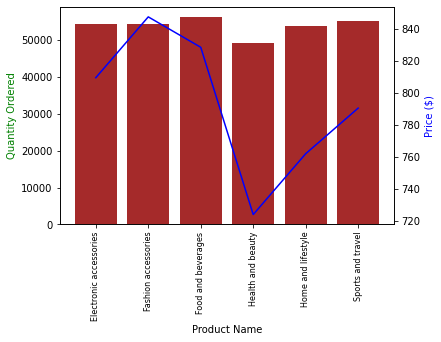

In [13]:
margin = df.groupby('Product line').sum()['gross margin percentage']
product_group = df.groupby('Product line')
keys = [pair for pair, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, sales, color='brown')
ax2.plot(keys, margin, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

### Which gender spends more?

In [14]:
df_gender = df.groupby('Gender').sum()

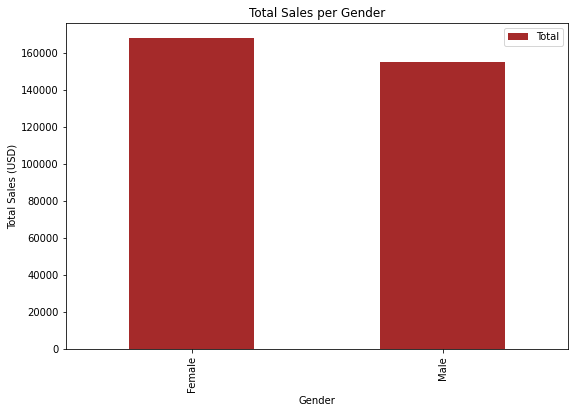

In [15]:
df_gender.plot(kind='bar', y = 'Total', figsize=(9, 6), color = 'brown')
plt.title('Total Sales per Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (USD)')
plt.show()

### Combining purchase date time to one column and extracting hour and months into one column

In [16]:
df['Purchase Date Time'] = df['Date'] + ' ' + df ['Time']

In [17]:
df['Purchase Date Time'] = pd.to_datetime(df['Purchase Date Time'])

In [18]:
df['Hour'] = pd.to_datetime(df['Purchase Date Time'], format='%H:%M').dt.hour 

In [19]:
df['Month'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y').dt.month

In [20]:
df['Day'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.day

In [21]:
df.drop(labels=['Date', 'Time'], axis=1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Purchase Date Time,Hour,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00,13,1,29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00,17,3,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00,13,2,9
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00,15,2,22


### Now we find out which month, day and hour has the best sales 

In [22]:
df_month = df.groupby('Month').sum()

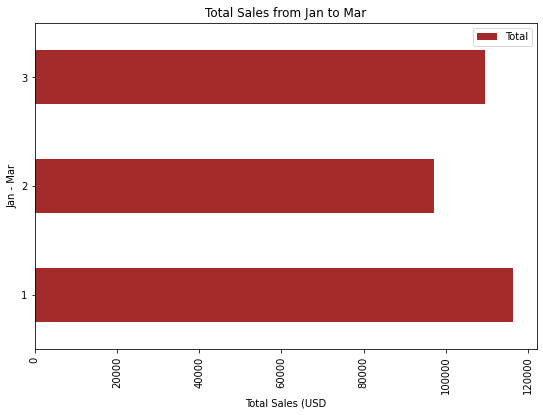

In [23]:
df_month.plot(kind='barh', y = 'Total', figsize=(9, 6), color = 'brown')
plt.title('Total Sales from Jan to Mar')
plt.xticks(rotation='vertical')
plt.xlabel('Total Sales (USD')
plt.ylabel('Jan - Mar')
plt.show()

In [24]:
df_hour = df.groupby('Hour').sum()

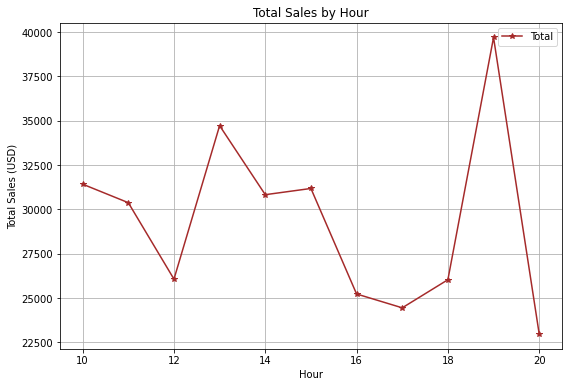

In [25]:
df_hour.plot(kind='line', y = 'Total', marker='*', figsize=(9, 6), color = 'brown')
plt.title('Total Sales by Hour')
plt.xticks(rotation='horizontal')
plt.xlabel('Hour')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

In [26]:
df_day = df.groupby('Day').sum()

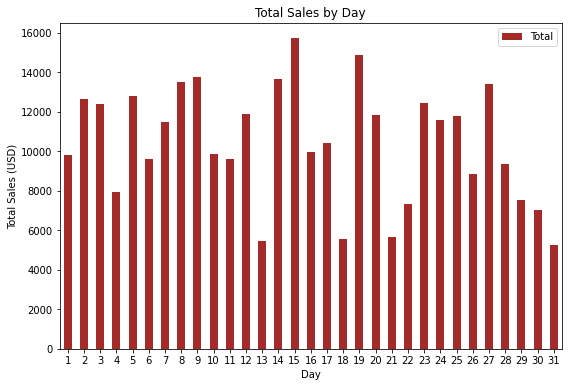

In [27]:
df_day.plot(kind='bar', y = 'Total', figsize=(9, 6), color = 'brown')
plt.title('Total Sales by Day')
plt.xticks(rotation='horizontal')
plt.xlabel('Day')
plt.ylabel('Total Sales (USD)')
plt.show()

### Find out if there's any difference in spending amongst customer type, payment type, and satisfaction ratings

In [28]:
df_type = df.groupby('Customer type').sum()

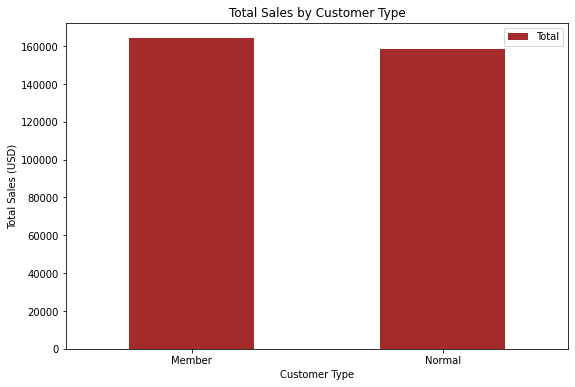

In [29]:
df_type.plot(kind='bar', y = 'Total', figsize=(9, 6), color = 'brown')
plt.title('Total Sales by Customer Type')
plt.xticks(rotation='horizontal')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales (USD)')
plt.show()

In [30]:
df_payment = df.groupby('Payment').sum()
df_payment

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Month,Day
Payment,,,,,,,,,,,
Cash,19525.09,1896,5343.170,112206.570,106863.40,1638.095238,5343.170,2397.7,5061,676,5336
Credit card,16916.68,1722,4798.432,100767.072,95968.64,1480.952381,4798.432,2178.0,4653,617,4600
Ewallet,19230.36,1892,5237.767,109993.107,104755.34,1642.857143,5237.767,2397.0,5196,700,5320


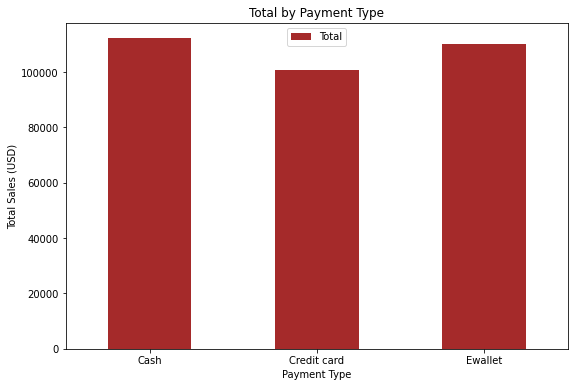

In [31]:
df_payment.plot(kind='bar', y = 'Total', figsize=(9, 6), color = 'brown')
plt.title('Total by Payment Type')
plt.xticks(rotation='horizontal')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales (USD)')
plt.show()

In [32]:
ratings = df.groupby('Rating').sum()
ratings.head(10) 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Hour,Month,Day
Rating,,,,,,,,,,
4.0,691.83,55,189.8340,3986.5140,3796.68,52.380952,189.8340,173,22,169
4.1,809.18,75,170.9135,3589.1835,3418.27,80.952381,170.9135,256,33,246
4.2,1307.83,150,441.7100,9275.9100,8834.20,104.761905,441.7100,322,47,365
4.3,861.32,100,283.7195,5958.1095,5674.39,85.714286,283.7195,309,36,282
4.4,988.01,97,319.8365,6716.5665,6396.73,80.952381,319.8365,258,38,175
4.5,1180.49,105,381.9250,8020.4250,7638.50,80.952381,381.9250,260,32,310
4.6,468.50,43,125.4310,2634.0510,2508.62,38.095238,125.4310,123,19,120
4.7,709.45,53,181.0675,3802.4175,3621.35,57.142857,181.0675,186,26,189
4.8,820.97,75,211.9005,4449.9105,4238.01,61.904762,211.9005,188,28,211


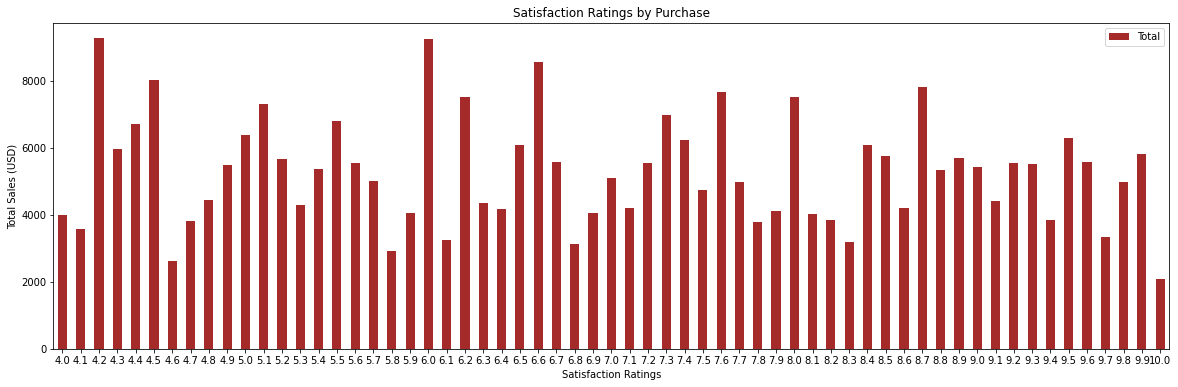

In [33]:
ratings.plot(kind='bar', y = 'Total', figsize=(20, 6), color = 'brown')
plt.title('Satisfaction Ratings by Purchase')
plt.xticks(rotation='horizontal')
plt.xlabel('Satisfaction Ratings')
plt.ylabel('Total Sales (USD)')
plt.show()

In [34]:
margin = df.groupby('Product line').sum()['gross margin percentage']
margin

Product line
Electronic accessories    809.523810
Fashion accessories       847.619048
Food and beverages        828.571429
Health and beauty         723.809524
Home and lifestyle        761.904762
Sports and travel         790.476190
Name: gross margin percentage, dtype: float64

In [35]:
branch = df.groupby('Branch').sum()['Total']
branch

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

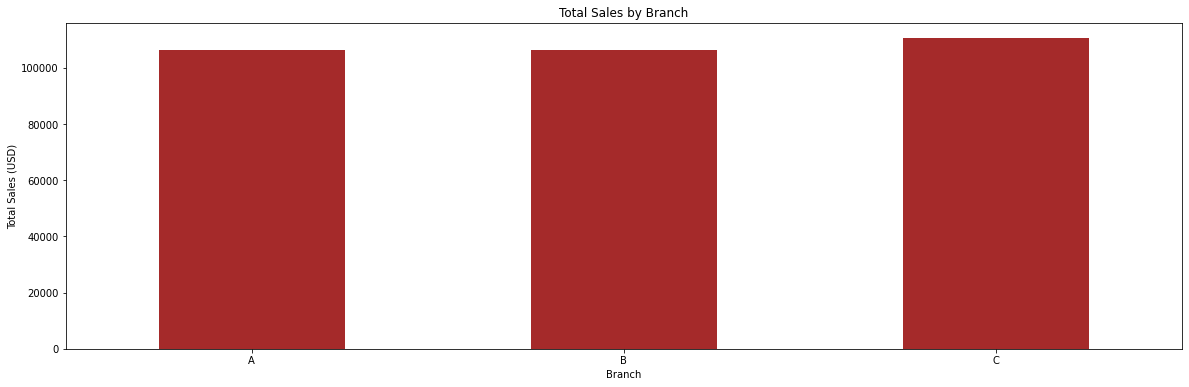

In [36]:
branch.plot(kind='bar', y = 'Total', figsize=(20, 6), color = 'brown')
plt.title('Total Sales by Branch')
plt.xticks(rotation='horizontal')
plt.xlabel('Branch')
plt.ylabel('Total Sales (USD)')
plt.show()

#### In conclusion, 3 months worth of dataset is not enough to identify significant trends in customer spending between the 3 branches. Similarly, we don't see much difference in spending between members and non-members, by gender or product line. We can however, see that the 15th of each month (between Jan - Mar) generates most sales in total and that 7pm is the peak hour.
